<a href="https://colab.research.google.com/github/tejpal123456789/End-to-End-Machine-Learning-Projects/blob/main/student_marks_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/drive/MyDrive/End to end machine learning Projects/Student marks/student_info.csv')
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


## Feature Enginnering 


In [ ]:
data.shape
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

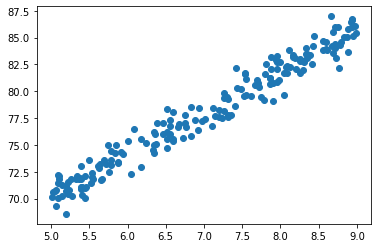

In [ ]:
plt.scatter(data['study_hours'],data['student_marks'])

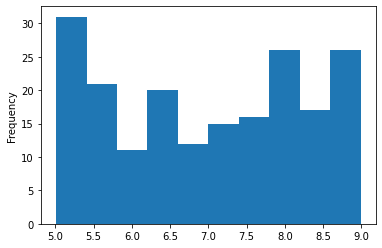

In [ ]:
data['study_hours'].plot.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


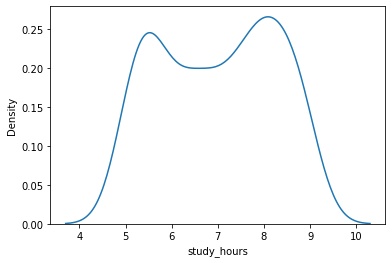

In [ ]:
sns.distplot(data['study_hours'],hist=False,kde=True)

In [ ]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [ ]:
data['study_hours']=data['study_hours'].fillna(data['study_hours'].mean())
data.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop(['student_marks'],axis=1)
y=data['student_marks']

(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.1,random_state=0) 

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
test_score=model.score(x_test,y_test)
print(test_score)


0.948053126677359


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
lr=LinearRegression().fit(x_train,y_train)
mse=get_cv_scores(lr)


CV Mean:  0.9570024504568497
STD:  0.0061146930914053235




In [ ]:
y_pred=lr.predict(x_test)
test_score=lr.score(x_test,y_test)
print(test_score)

0.948053126677359


In [ ]:
print(y_pred)
print(y_test)

[83.44018    70.88302637 72.94988706 85.27305647 73.22286866 84.41511429
 80.08640605 81.8022904  80.86635348 82.15326674 78.95548228 84.76609064
 77.8245585  77.66856902 83.1671984  85.70202755 84.88308275 72.63790809
 78.68250068 79.15046914]
18     82.50
170    71.18
107    73.25
98     83.64
177    73.64
182    86.99
5      81.18
146    82.75
12     79.50
152    81.70
61     79.41
125    85.95
180    77.19
154    78.45
80     84.00
7      85.46
33     84.35
130    73.19
37     78.21
74     77.59
Name: student_marks, dtype: float64


In [ ]:
lr.predict([[4]])

array([66.24233916])

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-5,1e-2,1e-1,-1,0,1,2,10,50,100,1000]}
from sklearn.model_selection import GridSearchCV
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
model=lasso_regressor.fit(x_train,y_train)
train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
print(train_score)
print(test_score)

0.95783999994751
0.9480531266773589


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.67972250632673, tolerance: 0.34293791326388895
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dis

Model Downloading By Pickle

In [ ]:
import pickle
pickle.dump(lasso_regressor,open('student_marks.pkl','wb'))
pickle.load(open('student_marks.pkl','rb'))

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.01, 0.1, -1, 0, 1, 2, 10, 50, 100,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)